In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

Имеющиеся экспериментальные данные:

* $R ↦ t$
* комнатная температура (исходная температура образцов), $R_{ambient}$ (измерение R при комнатной температуре)
* приборные константы:
    * масса образца $m$
    * напряжение на нагревателе $U$
    * ток через нагреватель $I$
    * температурный коэффициент сопротивления материала нагревателя $\alpha$

In [2]:
data = {}
work = {}

kinds = ["empty", "brass", "iron"]
colors = {
    "empty": "black",
    "brass": "#808000",
    "iron": "#800080"
}

constants = ll.read_csv("constants.csv")

for kind in kinds:
    data[kind] = ll.read_csv("measurements/%s.csv" % kind)
    work[kind] = ll.varlist()
    ll.add(work[kind],
           constants,
           ll.read_csv("constants/%s.csv" % kind),
           ll.var("R_ambient", data[kind].R[0], data[kind].Error_R[0]))

for kind in kinds:
    disp("Data for kind %s:" % kind, data[kind])

for kind in kinds:
    disp("Work variables for kind %s:" % kind, work[kind])


'Data for kind empty:'

,R,Error_R,ErrorRel_R,t,Error_t,ErrorRel_t
0,18.144000,0.005000,0.03%,0,0.500000,inf%
1,18.194000,0.005000,0.03%,40,0.500000,1.25%
2,18.244000,0.005000,0.03%,84,0.500000,0.60%
3,18.294000,0.005000,0.03%,129,0.500000,0.39%
4,18.344000,0.005000,0.03%,175,0.500000,0.29%
5,18.394000,0.005000,0.03%,223,0.500000,0.22%
6,18.444000,0.005000,0.03%,273,0.500000,0.18%
7,18.494000,0.005000,0.03%,325,0.500000,0.15%
8,18.544000,0.005000,0.03%,378,0.500000,0.13%
9,18.594000,0.005000,0.03%,433,0.500000,0.12%


'Data for kind brass:'

,R,Error_R,ErrorRel_R,t,Error_t,ErrorRel_t
0,18.146000,0.005000,0.03%,0,0.500000,inf%
1,18.196000,0.005000,0.03%,44,0.500000,1.14%
2,18.246000,0.005000,0.03%,105,0.500000,0.48%
3,18.296000,0.005000,0.03%,172,0.500000,0.29%
4,18.346000,0.005000,0.03%,243,0.500000,0.21%
5,18.396000,0.005000,0.03%,315,0.500000,0.16%
6,18.446000,0.005000,0.03%,389,0.500000,0.13%
7,18.496000,0.005000,0.03%,465,0.500000,0.11%
8,18.546000,0.005000,0.03%,544,0.500000,0.09%
9,18.596000,0.005000,0.03%,624,0.500000,0.08%


'Data for kind iron:'

,R,Error_R,ErrorRel_R,t,Error_t,ErrorRel_t
0,18.147000,0.005000,0.03%,0,0.500000,inf%
1,18.197000,0.005000,0.03%,46,0.500000,1.09%
2,18.247000,0.005000,0.03%,110,0.500000,0.45%
3,18.297000,0.005000,0.03%,180,0.500000,0.28%
4,18.347000,0.005000,0.03%,252,0.500000,0.20%
5,18.397000,0.005000,0.03%,327,0.500000,0.15%
6,18.497000,0.005000,0.03%,482,0.500000,0.10%
7,18.547000,0.005000,0.03%,562,0.500000,0.09%
8,18.597000,0.005000,0.03%,644,0.500000,0.08%
9,18.647000,0.005000,0.03%,728,0.500000,0.07%


'Work variables for kind empty:'

,Value,Error,ErrorRel
alpha,0.004280,0.000005,0.12%
U,36.000000,0.100000,0.28%
I,0.300000,0.010000,3.33%
T_ambient,24.000000,1.000000,4.17%
m,1.000000,0.000000,0.00%
R_ambient,18.144000,0.005000,0.03%


'Work variables for kind brass:'

,Value,Error,ErrorRel
alpha,0.004280,0.000005,0.12%
U,36.000000,0.100000,0.28%
I,0.300000,0.010000,3.33%
T_ambient,24.000000,1.000000,4.17%
m,0.878000,0.000100,0.01%
R_ambient,18.146000,0.005000,0.03%


'Work variables for kind iron:'

,Value,Error,ErrorRel
alpha,0.004280,0.000005,0.12%
U,36.000000,0.100000,0.28%
I,0.300000,0.010000,3.33%
T_ambient,25.000000,1.000000,4.00%
m,0.816500,0.000100,0.01%
R_ambient,18.147000,0.005000,0.03%


Будем считать, что зависимость $t(R)$ имеет вид $t(R) = e^{R/C} + B$.

Выразим теплоёмкость образца в калориметре (вместе с теплоёмкостью калориметра) через значение $\frac{\partial t}{\partial R}_{R = R_{ambient}}$:

$$C = \frac{P - \lambda(T - T_{ambient})}{\partial T / \partial t}$$

при $T = T_{ambient}$,

$$C = \frac{P}{(\partial T / \partial t)_{T = T_{ambient}}}$$

Найдём $\frac{\partial T}{\partial t}$:

$$R(T) = R_0(1 + \alpha \Delta T)$$

$$\frac{\partial R}{\partial t} = R_0 \alpha \frac{\partial T}{\partial t}$$

Итак,

$$C = \frac{P}{\frac{\partial T}{\partial t}_{T = T_{ambient}}} = \frac{P R_0 \alpha}{\frac{\partial R}{\partial t}_{R = R_{ambient}}} = P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}$$

В свою очередь,

$$P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}} = \frac{P R_{ambient} \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}}{1 + \alpha \Delta T_{ambient}}$$

In [3]:
def R(kind):
    return data[kind].R
def Rerr(kind):
    return data[kind].Error_R
def t(kind):
    return data[kind].t
def terr(kind):
    return data[kind].Error_t
def t_R_model(x, a, b):
    return ll.exp(x/a) + b
def C(dt_dR_at_ambient, U, I, R_ambient, alpha, T_ambient):
    return (U * I * R_ambient * alpha * dt_dR_at_ambient) / (1 + alpha * T_ambient)
    
t_R_model_args = ["a", "c"]

Построим график $t(R)$.

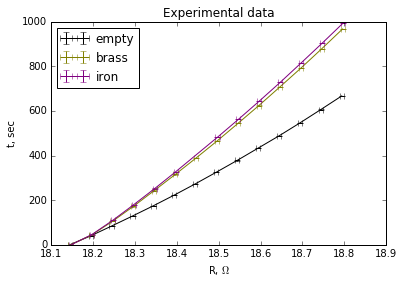

In [4]:
plt.title("Experimental data")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

for kind in kinds:
    plt.errorbar(x = R(kind), y = t(kind), xerr = Rerr(kind), yerr = terr(kind),
                 label = kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")

Выполним приближение модельной функции $t(R)$ к экспериментальным данным методом наименьших квадратов и затем Deming regression.

Initial guesses for empty:
          Value    Error  ErrorRel
a     2.369040 0.000173  0.000073
c -2127.700155 1.399899 -0.000658


'Final guesses for empty:'

,Value,Error,ErrorRel
a,2.369706,0.001544,0.07%
c,-2122.372717,12.229929,-0.58%


Initial guesses for brass:
          Value    Error  ErrorRel
a     2.269843 0.000109  0.000048
c -2988.088183 1.348299 -0.000451


'Final guesses for brass:'

,Value,Error,ErrorRel
a,2.270482,0.002069,0.09%
c,-2980.249898,25.106852,-0.84%


Initial guesses for iron:
          Value    Error  ErrorRel
a     2.263437 0.000106  0.000047
c -3054.980667 1.348748 -0.000441


'Final guesses for iron:'

,Value,Error,ErrorRel
a,2.263916,0.001860,0.08%
c,-3048.935899,23.259529,-0.76%


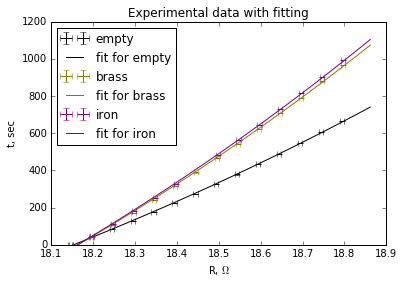

In [5]:
for kind in kinds:
    ll.add(work[kind], ll.fit(name = kind,
                              model = t_R_model,
                              model_args = t_R_model_args,
                              x = R(kind),
                              y = t(kind),
                              xerr = Rerr(kind),
                              yerr = terr(kind)))


plt.title("Experimental data with fitting")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

R_linspace = ll.linspace([R for R in R(kind) for kind in data])

for kind in kinds:
    plt.errorbar(x = R(kind), y = t(kind), xerr = Rerr(kind), yerr = terr(kind),
                 ls = "none", label = kind, color = colors[kind])
    plt.errorbar(x = R_linspace, y = t_R_model(R_linspace, *work[kind].Value[t_R_model_args]),
                 label = "fit for %s" % kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")


Используя полученные коэффициенты, продифференцируем модельную функцию $t(R)$ по $R$ в точке $R_{ambient}$ и подставим значения в основную формулу.

Таким образом найдём полную теплоёмкость пустого калориметра, после чего модифицируем основную формулу и для каждого из образцов будем находить удельную теплоёмкость образца: $c = \frac{C - C_{empty}}{m}$.

In [6]:
sym_R = smp.symbols("R")
sym_t_R_args = smp.symbols(t_R_model_args)
sym_t_R_model = t_R_model(sym_R, *sym_t_R_args)
dt_dR = smp.diff(sym_t_R_model, sym_R)

print("t(R): %s" % sym_t_R_model)
print("dt/dR: %s" % dt_dR)

#
# Generate final symbolic expression for C.
#

sym_U, sym_I, sym_R_ambient, sym_alpha, sym_T_ambient, sym_m = smp.symbols("U I R_ambient alpha T_ambient m")
sym_C = C(U = sym_U,
          I = sym_I,
          R_ambient = sym_R_ambient,
          alpha = sym_alpha,
          T_ambient = sym_T_ambient,
          dt_dR_at_ambient = dt_dR.subs(sym_R, sym_R_ambient))
print("Symbolic formula for C: %s" % sym_C)

#
# Now compute its error as square root of sum of squares of products of
# partial differentials of C for each variable by absolute error of the corresponding variable.
#

ll.add_multi(work.values(), ll.sym_compute("C_empty", sym_C, work["empty"]))
disp("C for empty:", work["empty"].loc[["C_empty"]])

for kind in set(kinds) - set(["empty"]):
    ll.add(work[kind], ll.sym_compute("C", sym_C, work[kind]))
    disp("C for %s:" % kind, work[kind].loc[["C"]])

sym_C_empty = smp.symbols("C_empty")
sym_C = (sym_C - sym_C_empty) / sym_m

for kind in set(kinds) - set(["empty"]):
    ll.add(work[kind], ll.sym_compute("C_sp", sym_C, work[kind]))
    disp("Specific C for %s:" % kind, work[kind].loc[["C_sp"]])
    

t(R): c + exp(R/a)
dt/dR: exp(R/a)/a
Symbolic formula for C: I*R_ambient*U*alpha*exp(R_ambient/a)/(a*(T_ambient*alpha + 1))
Error influence estimations for C_empty:


,Error,Derivative,(E*D)^2
I,0.010000,2262.34145069088,511.818883951409
a,0.001544,-2479.33081787981,14.6512239606984
T_ambient,1.000000,-2.63425567930851,6.93930298396916
U,0.100000,18.8528454224240,3.55429780521812
R_ambient,0.005000,323.814262146972,2.62139190924470
alpha,0.000005,143803.808155107,0.516988380997771


'C for empty:'

,Value,Error,ErrorRel
C_empty,678.702435,23.240097,0.034242


Error influence estimations for C:


,Error,Derivative,(E*D)^2
I,0.010000,3302.81096964515,1090.85603012083
a,0.002069,-3924.18655663624,65.9250176780298
T_ambient,1.000000,-3.84577162382506,14.7899593826181
U,0.100000,27.5234247470429,7.57538909806135
R_ambient,0.005000,491.006070109844,6.02717402211783
alpha,0.000005,209940.367271435,1.10187394525163


'C for brass:'

,Value,Error,ErrorRel
C,990.843291,34.442350,0.034761


Error influence estimations for C:


,Error,Derivative,(E*D)^2
I,0.010000,3378.64615954857,1141.52498714323
a,0.001860,-4036.50940913746,56.3582919944350
T_ambient,1.000000,-3.91886329617016,15.3574895340697
U,0.100000,28.1553846629048,7.92725685516134
R_ambient,0.005000,503.571765985304,6.33961308743895
alpha,0.000005,213930.435855215,1.14415578463005


'C for iron:'

,Value,Error,ErrorRel
C,1013.593848,35.052130,0.034582


Error influence estimations for C_sp:


,Error,Derivative,(E*D)^2
I,0.010000,3761.74370119038,1415.07156734455
C_empty,23.240097,-1.13895216400911,700.626928294707
a,0.002069,-4469.46077065631,85.5187261352289
T_ambient,1.000000,-4.38014991324039,19.1857132624598
U,0.100000,31.3478641765865,9.82688588433714
R_ambient,0.005000,559.232426093216,7.81852265985262
alpha,0.000005,239112.035616669,1.42936413941868
m,0.000100,-404.912873644132,0.00163954435242748


'Specific C for brass:'

,Value,Error,ErrorRel
C_sp,355.513503,47.323138,0.133112


Error influence estimations for C_sp:


,Error,Derivative,(E*D)^2
I,0.010000,4137.96222847345,1712.27314042730
C_empty,23.240097,-1.22473974280465,810.146348511637
a,0.001860,-4943.67349557557,84.5367299965387
T_ambient,1.000000,-4.79958762543804,23.0360413742580
U,0.100000,34.4830185706121,11.8907856974118
R_ambient,0.005000,616.744355156527,9.50933999043601
alpha,0.000005,262009.106987403,1.71621930360841
m,0.000100,-502.332911947827,0.00252338354425983


'Specific C for iron:'

,Value,Error,ErrorRel
C_sp,410.154823,51.508360,0.125583


В результате получаем теплоёмкости:
- пустого калориметра $670 \pm 20 \frac{Дж}{К}$;
- образца из латуни (вместе с калориметром) $990 \pm 30 \frac{Дж}{К}$;
- образца из железа (вместе с калориметром) $1010 \pm 30 \frac{Дж}{К}$.

Вычитая теплоёмкость пустого калориметра и приводя к удельной теплоёмкости:
- образца из латуни $350 \pm 40 \frac{Дж}{кг * К}$ ($11\%$);
- образца из железа $410 \pm 50 \frac{Дж}{кг * К}$ ($12\%$).

'Final guesses for empty:'

,Value,Error,ErrorRel
a,-1.904621,0.046488,-2.44%
b,1609.771960,48.423881,3.01%
c,20.051089,0.047042,0.23%


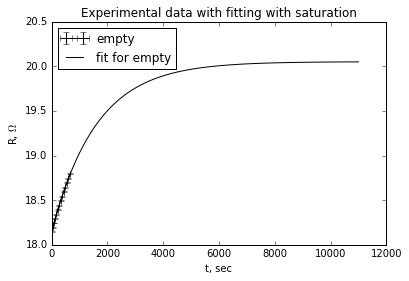

In [7]:
def R_t_model(x, a, b, c):
    return a * ll.exp(-x/b) + c
    
R_t_model_args = ["a", "b", "c"]

kind = "empty"

R_t_fit =  ll.fit(name = kind,
                  model = R_t_model,
                  model_args = R_t_model_args,
                  x = t(kind),
                  y = R(kind), xerr = terr(kind), yerr = Rerr(kind), initial = [-2, 1600, 20])

plt.title("Experimental data with fitting with saturation")
plt.ylabel("R, $\Omega$")
plt.xlabel("t, sec")

t_linspace = ll.linspace([t for t in t(kind) for kind in data] + [10000])


plt.errorbar(x = t(kind), y = R(kind), xerr = terr(kind), yerr = Rerr(kind),
             label = kind, color = colors[kind])
plt.errorbar(x = t_linspace, y = R_t_model(t_linspace, *R_t_fit.Value[R_t_model_args]),
             label = "fit for %s" % kind, color = colors[kind])

plt.axis([0, None, None, None])
plt.legend(loc = "best")

In [8]:
d = work["empty"]
R_0 = d.Value["R_ambient"] / (1 + d.Value["alpha"] * d.Value["T_ambient"])

R_sat = R_t_fit.Value["c"]
disp("R_sat", R_sat)

T_sat = (R_sat/ R_0 - 1) / d.Value["alpha"]
disp("T_sat", T_sat)

coef = d.Value["U"]*d.Value["I"] / (T_sat - d.Value["T_ambient"])
disp("coef", coef)

'R_sat'

20.051088708322563

'T_sat'

51.080665945044203

'coef'

0.39880850869461032